# <p style="background-color:#e36288; font-family:newtimeroman; color:#FFF9ED; font-size:250%; text-align:center; border-radius:10px 10px;">Principal Component Analysis: Image Recognition Project</p>

<div class="alert alert-block alert-info alert">

## <span style=" color:#bf2e98">About the Dataset

#### Data Set Information from Original Authors:

We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds.

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input devices, but subjects are not aware of this.

SOURCE: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

 E. Alpaydin, Fevzi. Alimoglu, Department of Computer Engineering, Bogazici University, 80815 Istanbul Turkey
</span>

### <span style=" color:#bf2e98">Goal: Using PCA, figure out which handwritten digits are the most differentiated

Imagine you are working on an image recognition service for a postal service. It would be very useful to be able to read in the digits automatically, even if they are handwritten. The manager of the postal service wants to know which handwritten numbers are the hardest to tell apart, so he can focus on getting more labeled examples of that data. You will have a dataset of hand written digits and you will perform PCA to get better insight into which numbers are easily separable from the rest.
</span>

## Import Libraries and Dataset

In [1]:
!pip install ipympl
# install it to display inteactive plots

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

**Import the dataset**

In [3]:
digits = pd.read_csv('digits.csv')

In [4]:
digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


**Create a new DataFrame called *pixels* that consists only of the pixel feature values by dropping the number_label (target) column.**

In [5]:
pixels = digits.drop("number_label", axis=1)

In [6]:
pixels
# Now, we have 64 columns 

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


### Displaying an Image

**Grab a single image row representation by getting the first row of the pixels DataFrame.**

In [7]:
# Display it as pd series
single_image = pixels.iloc[0]
single_image

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

In [8]:
# As dataframe
#single_image = pixels.iloc[:1]
#single_image.T

**Convert this single row Series into a numpy array.**

In [9]:
single_image.to_numpy()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

**Reshape this numpy array into an (8,8) array.**

In [10]:
# First, check the shape
single_image.to_numpy().shape

(64,)

In [11]:
# Reshape it
single_image.to_numpy().reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
# Let's assign it to a variable
number = single_image.to_numpy().reshape(8,8)

**Use Matplotlib or Seaborn to display the array as an image representation of the number drawn. Remember our palette or cmap choice would change the colors, but not the actual pixel values.**

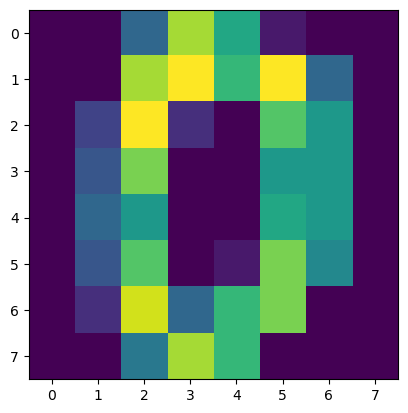

In [13]:
# Using matplotlib
plt.imshow(number);

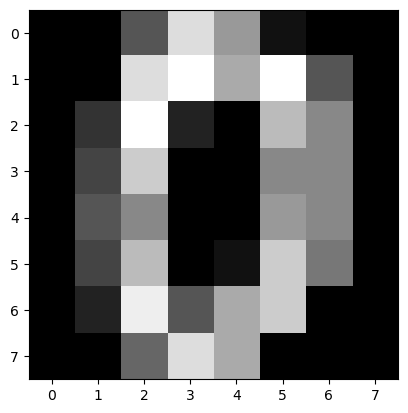

In [14]:
# We can change the color
plt.imshow(number, cmap="gray");

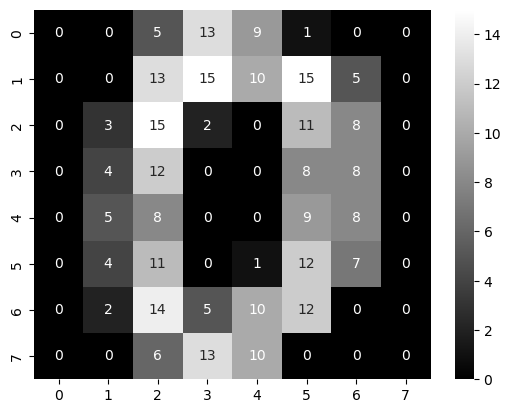

In [15]:
# Using seaborn heatmap
sns.heatmap(number, cmap="gray", annot=True);

# Principal Component Analysis (PCA)

### Scaling Data

**Use Scikit-Learn to scale the pixel feature dataframe.**

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale the pixels (X) data
scaled_pixels = scaler.fit_transform(pixels)

In [17]:
scaled_pixels

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## PCA Model

**Perform PCA on the scaled pixel data set with 2 components.**

In [18]:
from sklearn.decomposition import PCA

In [19]:
# the PCA model
pca_model = PCA(n_components=2)

# Fit the model over scaled data
pca_pixels = pca_model.fit_transform(scaled_pixels)

In [20]:
pca_pixels

array([[-1.91421366, -0.95450157],
       [-0.58898033,  0.9246358 ],
       [-1.30203906, -0.31718883],
       ...,
       [-1.02259599, -0.14791087],
       [-1.07605522, -0.38090625],
       [ 1.25770233, -2.22759088]])

**How much variance is explained by 2 principal components.**

In [21]:
#  Look at the pca model
pca_model.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [22]:
np.sum(pca_model.explained_variance_ratio_)

0.21594970500832816

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

**Insight:** PC1 explains %12 and PC2 explians %9 of the variance; in total, both explains about %21 of the variance in this dataset. To receive more information and better separation, we can increase dimensions if we want.
</span>

**Create a scatterplot of the digits in the 2 dimensional PCA space, color/label based on the original number_label column in the original dataset.**

In [23]:
# For PC!, grab all rows in the first column in the PC data
pca_pixels[:,0]

array([-1.91421366, -0.58898033, -1.30203906, ..., -1.02259599,
       -1.07605522,  1.25770233])

In [24]:
# The the PC2
pca_pixels[:,1]

array([-0.95450157,  0.9246358 , -0.31718883, ..., -0.14791087,
       -0.38090625, -2.22759088])

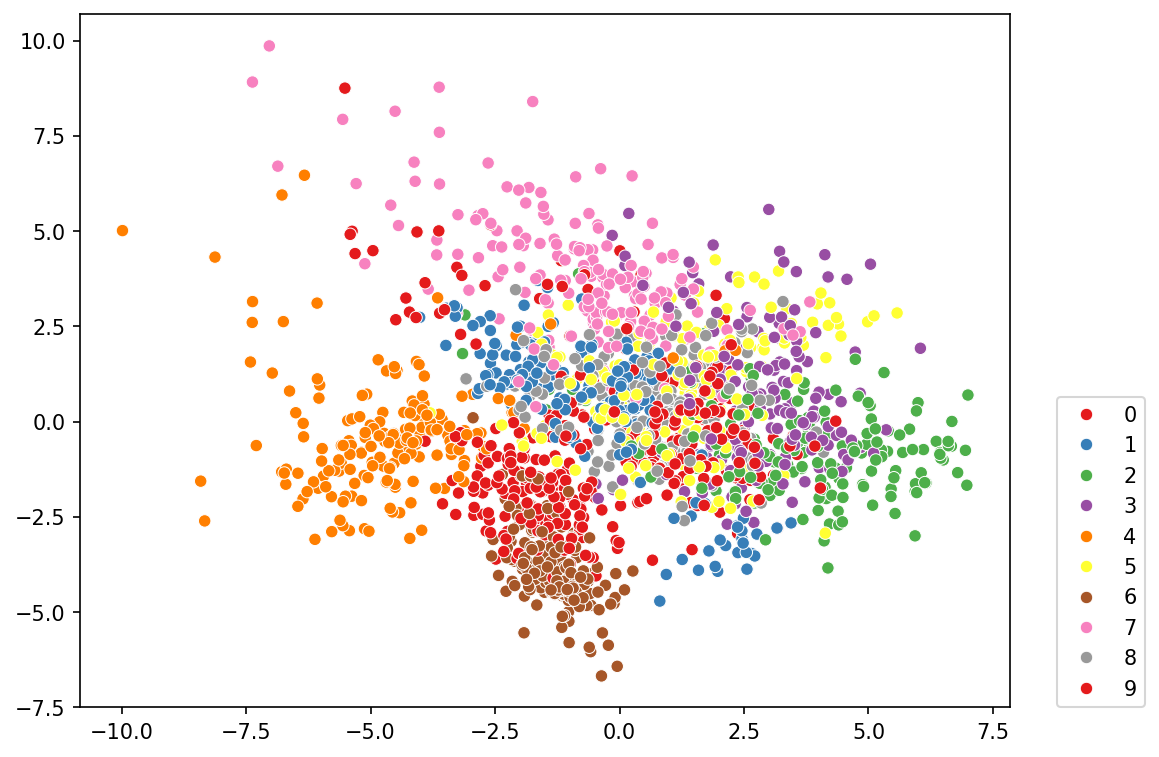

In [25]:
plt.figure(figsize=(8,6),dpi=150)

# For comaprison, use labels in the original data: digits["number_label"]
labels = digits['number_label'].values

# PC1 and PC2 according to labels
sns.scatterplot(x=pca_pixels[:,0], y=pca_pixels[:,1],hue=labels,palette='Set1')
plt.legend(loc=(1.05,0));

# For inteactive plots use "%matplotlib ipympl" before the related codes; 
# to change it again, use "%matplotlib inline"

**Which number or numbers are the most "distinct"?**

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

**Result:** Number 4 (with orange color) is the most distinct digit followed by 6 (brown).
</span>

**Create an "interactive" 3D plot of the result of PCA with 3 principal components.**

In [26]:
# New PCA model
from sklearn.decomposition import PCA

# n_components for 3
pca_model = PCA(n_components=3)

pca_pixels = pca_model.fit_transform(scaled_pixels)

**Interactive 3D visualization**

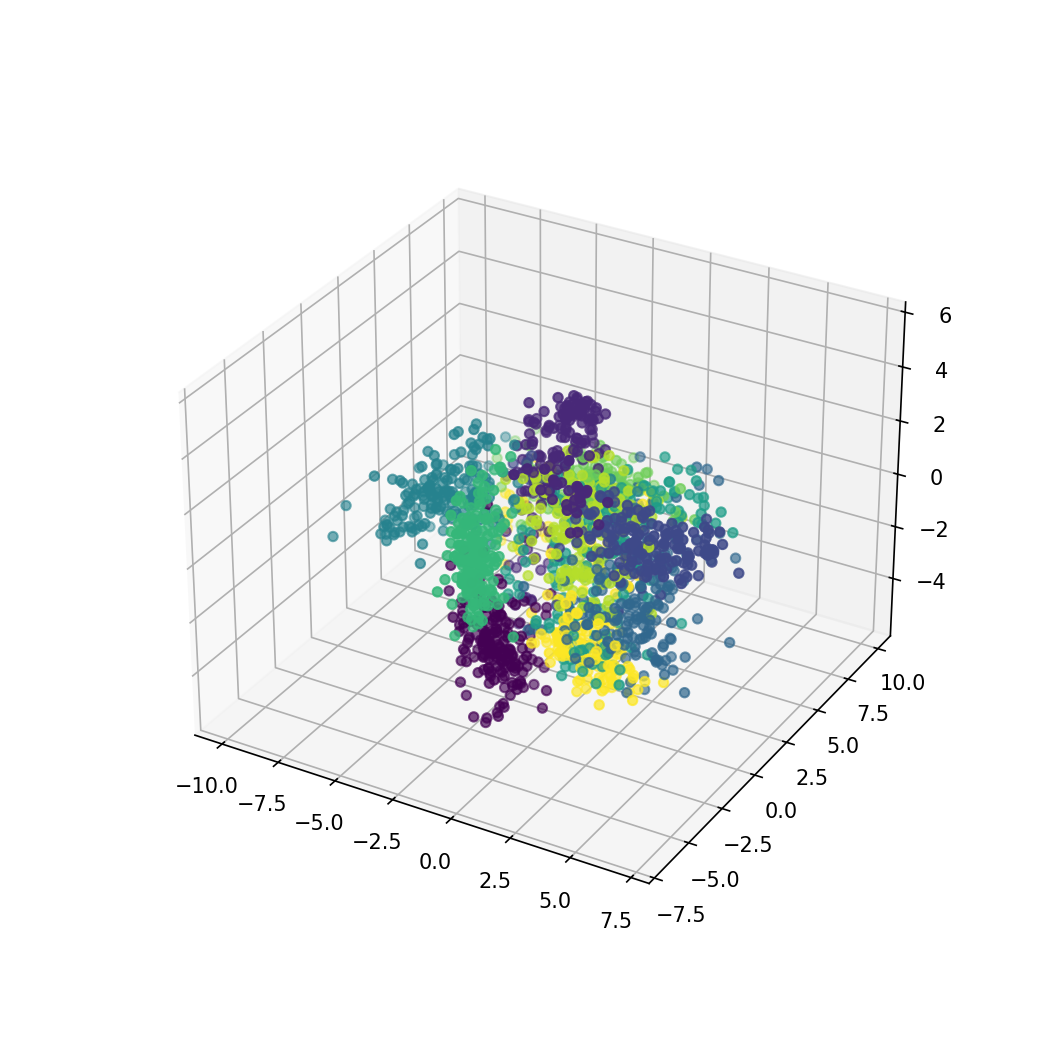

In [27]:
from mpl_toolkits import mplot3d

# For an inteactive plot
%matplotlib ipympl

plt.figure(figsize=(7,7),dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=digits['number_label']); 
# column 1, 2 and 3, then original labels as color